In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from termcolor import colored

# Lettura dati

In [38]:
# Define colors for AR and VR
labels = ["Strongly Disagree (SD)", "Disagree (D)", "Neutral (N)", "Agree (A)", "Strongly Agree (SA)"]
colors = ["#C33A22", "#eb6f65", "#7f7f7f", "#AFCDE2", "#4674AF"]
colors_vr = colors
colors_ar = colors_vr
# colors_ar = ["#C33A22", "#eb6f65", "#7f7f7f", "#F3C073", "#ED8515"]

# Load CSV files
vr_data = pd.read_csv("./data/VR-BUS-11-new.csv")
ar_data = pd.read_csv("./data/AR-BUS-11-new.csv")

# Remove the 'id' column
vr_data = vr_data.iloc[:, 1:]
ar_data = ar_data.iloc[:, 1:]

# Plot

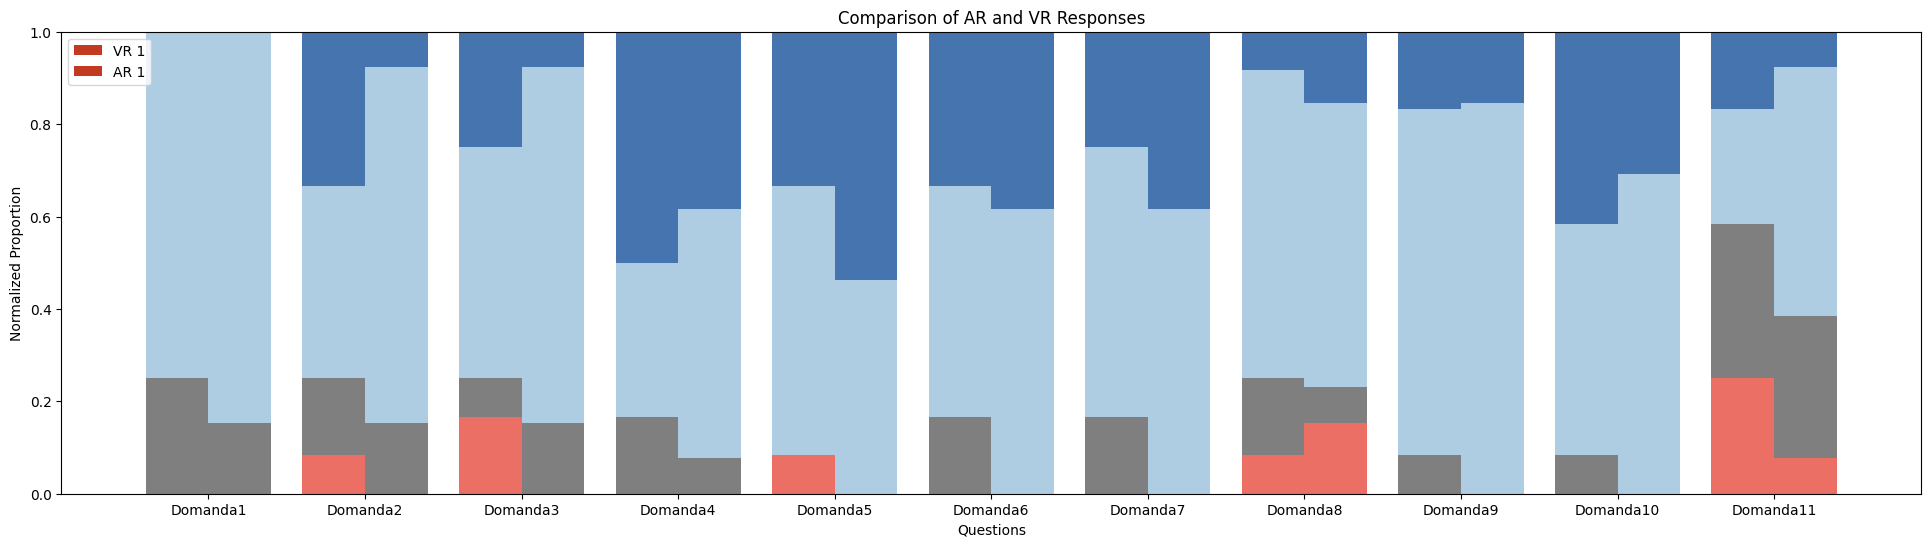

In [39]:
# Compute normalized counts for each response category (1 to 5)
def normalize_counts(data):
    counts = np.array([(data == i).sum(axis=0) for i in range(1, 6)])
    return counts / counts.sum(axis=0)

vr_counts = normalize_counts(vr_data)
ar_counts = normalize_counts(ar_data)

# Plot settings
fig, ax = plt.subplots(figsize=(24, 6))
x = np.arange(1, 12)  # 11 groups (questions)
bar_width = 0.4

# Plot VR bars
bottom_vr = np.zeros(11)
for i in range(5):
    ax.bar(x - bar_width/2, vr_counts[i], width=bar_width, color=colors_vr[i], bottom=bottom_vr, label=f'VR {i+1}' if i == 0 else "")
    bottom_vr += vr_counts[i]

# Plot AR bars
bottom_ar = np.zeros(11)
for i in range(5):
    ax.bar(x + bar_width/2, ar_counts[i], width=bar_width, color=colors_ar[i], bottom=bottom_ar, label=f'AR {i+1}' if i == 0 else "")
    bottom_ar += ar_counts[i]

# Labels and title
ax.set_xlabel("Questions")
ax.set_ylabel("Normalized Proportion")
ax.set_title("Comparison of AR and VR Responses")
ax.set_xticks(x)
ax.set_xticklabels([f"Domanda{i}" for i in range(1, 12)])
ax.legend()

# Show plot
plt.show()


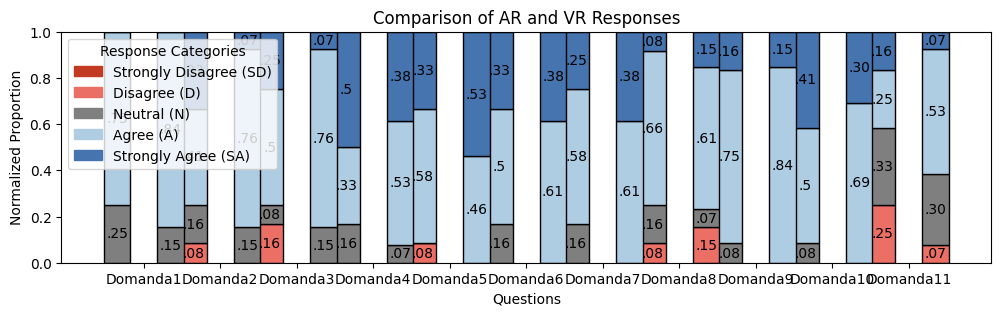

In [40]:
# Compute normalized counts for each response category (1 to 5)
def normalize_counts(data):
    counts = np.array([(data == i).sum(axis=0) for i in range(1, 6)])
    return counts / counts.sum(axis=0)

vr_counts = normalize_counts(vr_data)
ar_counts = normalize_counts(ar_data)

# Plot settings
# fig, ax = plt.subplots(figsize=(14, 7))
fig, ax = plt.subplots(figsize=(12, 3))
x = np.arange(1, 12)  # 11 groups (questions)
bar_width = 0.35  # Adjusted for spacing

# Plot VR bars
bottom_vr = np.zeros(11)
for i in range(5):
    bars = ax.bar(x - bar_width, vr_counts[i], width=bar_width, color=colors_vr[i], edgecolor='black', bottom=bottom_vr)
    for bar, val in zip(bars, vr_counts[i]):
        if val > 0.05:  # Avoid cluttering with too small values
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'.{str(val)[2:4]}', ha='center', va='center', fontsize=10, color='black')
            # ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center', fontsize=10, color='black')
    bottom_vr += vr_counts[i]

# Plot AR bars
bottom_ar = np.zeros(11)
for i in range(5):
    bars = ax.bar(x + bar_width, ar_counts[i], width=bar_width, color=colors_ar[i], edgecolor='black', bottom=bottom_ar)
    for bar, val in zip(bars, ar_counts[i]):
        if val > 0.05:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'.{str(val)[2:4]}', ha='center', va='center', fontsize=10, color='black')
            # ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center', fontsize=10, color='black')
    bottom_ar += ar_counts[i]

# Labels and title
ax.set_xlabel("Questions")
ax.set_ylabel("Normalized Proportion")
ax.set_title("Comparison of AR and VR Responses")
ax.set_xticks(x)
ax.set_xticklabels([f"Domanda{i}" for i in range(1, 12)])

# Improved legend
from matplotlib.patches import Patch
legend_patches = [Patch(color=colors_vr[i], label=labels[i]) for i in range(5)]
ax.legend(handles=legend_patches, title="Response Categories")

# Show plot
plt.show()


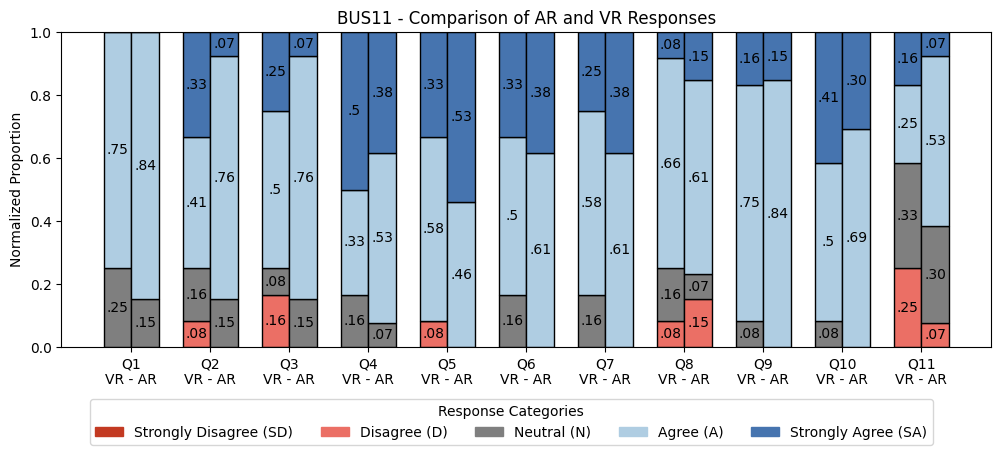

In [41]:
# Compute normalized counts for each response category (1 to 5)
def normalize_counts(data):
    counts = np.array([(data == i).sum(axis=0) for i in range(1, 6)])
    return counts / counts.sum(axis=0)

vr_counts = normalize_counts(vr_data)
ar_counts = normalize_counts(ar_data)

# Plot settings
# fig, ax = plt.subplots(figsize=(14, 8))
fig, ax = plt.subplots(figsize=(12, 5))
x = np.arange(11)  # 11 groups (questions)
bar_width = 0.35  # Adjusted for spacing

# Plot VR bars
bottom_vr = np.zeros(11)
for i in range(5):
    bars = ax.bar(x - bar_width/2, vr_counts[i], width=bar_width, color=colors[i], edgecolor='black', bottom=bottom_vr)
    for bar, val in zip(bars, vr_counts[i]):
        if val > 0.05:  # Avoid cluttering with too small values
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'.{str(val)[2:4]}', ha='center', va='center', fontsize=10, color='black')
    bottom_vr += vr_counts[i]

# Plot AR bars
bottom_ar = np.zeros(11)
for i in range(5):
    bars = ax.bar(x + bar_width/2, ar_counts[i], width=bar_width, color=colors[i], edgecolor='black', bottom=bottom_ar)
    for bar, val in zip(bars, ar_counts[i]):
        if val > 0.05:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'.{str(val)[2:4]}', ha='center', va='center', fontsize=10, color='black')
    bottom_ar += ar_counts[i]

# Labels and title
# ax.set_xlabel("Questions")
ax.set_ylabel("Normalized Proportion")
ax.set_title("BUS11 - Comparison of AR and VR Responses")
ax.set_xticks(x)
ax.set_xticklabels([f"Q{i+1}\nVR - AR" for i in range(11)])

# Improved legend in a separate white space
from matplotlib.patches import Patch
legend_patches = [Patch(color=colors[i], label=labels[i]) for i in range(5)]
plt.subplots_adjust(bottom=0.25)
legend_ax = fig.add_axes([0.1, 0.05, 0.8, 0.1], frameon=False)
legend_ax.set_xticks([])
legend_ax.set_yticks([])
legend_ax.legend(handles=legend_patches, title="Response Categories", loc='center', ncol=5)

# Show plot
plt.show()

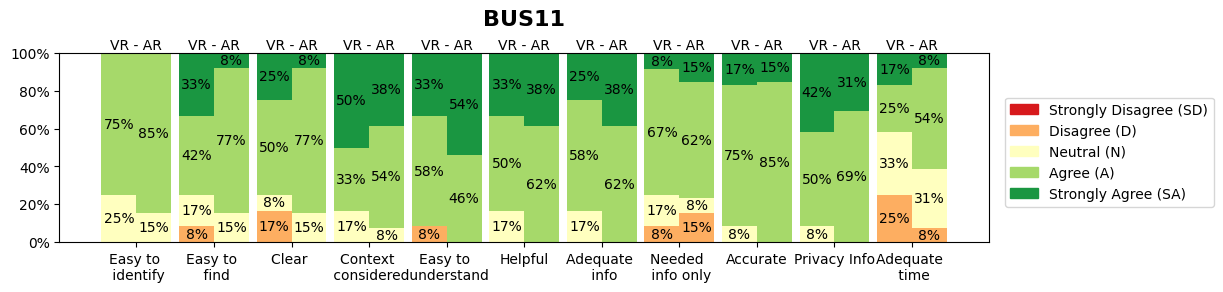

In [42]:
# Compute normalized counts for each response category (1 to 5)
def normalize_counts(data):
    counts = np.array([(data == i).sum(axis=0) for i in range(1, 6)], dtype=float)
    normalized = counts / counts.sum(axis=0)
    return normalized

vr_counts = normalize_counts(vr_data)
ar_counts = normalize_counts(ar_data)
colors = ["#D7191C", "#FDAE61", "#FFFFBF", "#A6D96A", "#1A9641"]  # Your predefined colors


# Plot settings
fig, ax = plt.subplots(figsize=(12, 3))
x = np.arange(11)  # 11 groups (questions)
bar_width = 0.45  # Adjusted for spacing

# Initialize bottom for stacking
bottom_vr = np.zeros(11)

# Plot VR bars
for i in range(5):
    bars = ax.bar(x - bar_width/2, vr_counts[i], width=bar_width,
                  color=colors[i],  bottom=bottom_vr)  # Assign specific color

    for bar, val in zip(bars, vr_counts[i]):
        if val > 0.05:  # Avoid cluttering with too small values
            s = f'{val:.0%}'.lstrip("0")  # Remove leading zero
            ax.text(bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + bar.get_height() / 2, s,
                    ha='center', va='center', fontsize=10, color='black')

    # Add label only for the top-most bar
    if i == 4:  # i == 4 corresponds to the last (top-most) bar
        for bar, val in zip(bars, vr_counts[i]):
            ax.text(bar.get_x() + bar.get_width() ,
                    bar.get_y() + bar.get_height() + 0.08,
                    "VR - AR", ha='center', va='top', fontsize=10, color='black')

    bottom_vr += vr_counts[i]  # Update bottom for stacking



# Plot AR bars
bottom_ar = np.zeros(11)
for i in range(5):
    bars = ax.bar(x + bar_width/2, ar_counts[i], width=bar_width,
                  color=colors[i],  bottom=bottom_ar)  # Assign specific color

    for bar, val in zip(bars, ar_counts[i]):
        if val > 0.05:  # Avoid cluttering with too small values
            s = f'{val:.0%}'.lstrip("0")  # Remove leading zero
            ax.text(bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + bar.get_height() / 2, s,
                    ha='center', va='center', fontsize=10, color='black')

    bottom_ar += ar_counts[i]  # Update bottom for stacking


qLabels = ["Easy to \n identify",
           "Easy to \n find",
           "Clear ",
           "Context \n considered",
           "Easy to \n understand",
           "Helpful",
           "Adequate \n info",
           "Needed \n info only",
           "Accurate",
           "Privacy Info",
           "Adequate \n time"]

# Labels and title
# ax.set_xlabel("Questions")
ax.set_ylabel(None)
ax.set_title("BUS11", fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels([f"{qLabels[i]}" for i in range(11)])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Improved legend in a separate white area
from matplotlib.patches import Patch
legend_patches = [Patch(color=colors[i], label=labels[i]) for i in range(5)]
plt.subplots_adjust(bottom=0.25)
#legend_ax = fig.add_axes([0.1, 0.0, 0.8, 0.1], frameon=False)
legend_ax = fig.add_axes([1, 0.5, 0, 0.1], frameon=False)
legend_ax.set_xticks([])
legend_ax.set_yticks([])
legend_ax.legend(handles=legend_patches, loc='center', ncol=1)

plt.savefig('bus11.pdf', format='pdf', bbox_inches='tight')
# Show plot
plt.show()

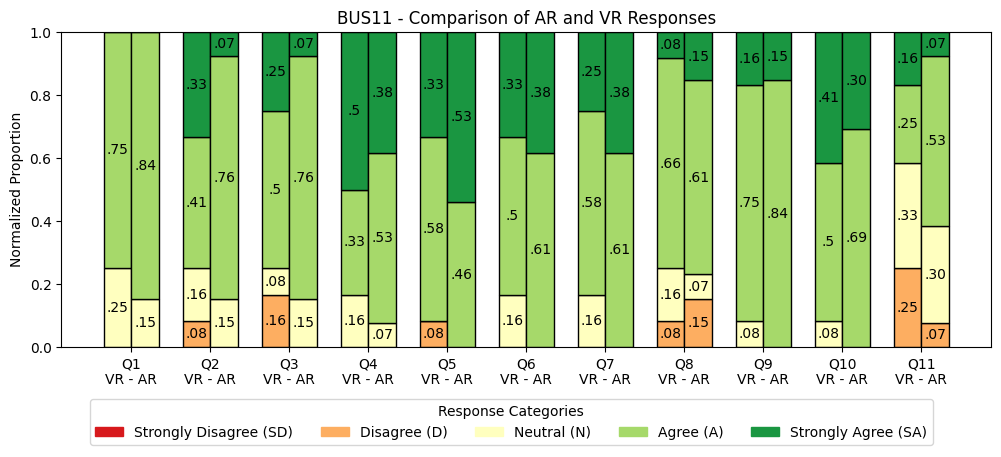

In [47]:
# Compute normalized counts for each response category (1 to 5)
def normalize_counts(data):
    counts = np.array([(data == i).sum(axis=0) for i in range(1, 6)])
    return counts / counts.sum(axis=0)

vr_counts = normalize_counts(vr_data)
ar_counts = normalize_counts(ar_data)

# Plot settings
# fig, ax = plt.subplots(figsize=(14, 8))
fig, ax = plt.subplots(figsize=(12, 5))
x = np.arange(11)  # 11 groups (questions)
bar_width = 0.35  # Adjusted for spacing

# Plot VR bars
bottom_vr = np.zeros(11)
for i in range(5):
    bars = ax.bar(x - bar_width/2, vr_counts[i], width=bar_width, color=colors[i], edgecolor='black', bottom=bottom_vr)
    for bar, val in zip(bars, vr_counts[i]):
        if val > 0.05:  # Avoid cluttering with too small values
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'.{str(val)[2:4]}', ha='center', va='center', fontsize=10, color='black')
    bottom_vr += vr_counts[i]

# Plot AR bars
bottom_ar = np.zeros(11)
for i in range(5):
    bars = ax.bar(x + bar_width/2, ar_counts[i], width=bar_width, color=colors[i], edgecolor='black', bottom=bottom_ar)
    for bar, val in zip(bars, ar_counts[i]):
        if val > 0.05:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'.{str(val)[2:4]}', ha='center', va='center', fontsize=10, color='black')
    bottom_ar += ar_counts[i]

# Labels and title
# ax.set_xlabel("Questions")
ax.set_ylabel("Normalized Proportion")
ax.set_title("BUS11 - Comparison of AR and VR Responses")
ax.set_xticks(x)
ax.set_xticklabels([f"Q{i+1}\nVR - AR" for i in range(11)])

# Improved legend in a separate white space
from matplotlib.patches import Patch
legend_patches = [Patch(color=colors[i], label=labels[i]) for i in range(5)]
plt.subplots_adjust(bottom=0.25)
legend_ax = fig.add_axes([0.1, 0.05, 0.8, 0.1], frameon=False)
legend_ax.set_xticks([])
legend_ax.set_yticks([])
legend_ax.legend(handles=legend_patches, title="Response Categories", loc='center', ncol=5)

# Show plot
plt.show()

# Plot x Carmen

In [43]:
# Compute raw counts (not normalized)
def compute_counts(data):
    return np.array([(data == i).sum(axis=0) for i in range(1, 6)])

vr_raw_counts = compute_counts(vr_data)
ar_raw_counts = compute_counts(ar_data)

# Compute quartiles and IQR
q1_vr = np.percentile(vr_raw_counts, 25, axis=0)
q2_vr = np.percentile(vr_raw_counts, 50, axis=0)
q3_vr = np.percentile(vr_raw_counts, 75, axis=0)
iqr_vr = q3_vr - q1_vr

q1_ar = np.percentile(ar_raw_counts, 25, axis=0)
q2_ar = np.percentile(ar_raw_counts, 50, axis=0)
q3_ar = np.percentile(ar_raw_counts, 75, axis=0)
iqr_ar = q3_ar - q1_ar

# Create DataFrame for table
questions = [f"Q{i+1}" for i in range(11)]
table_vr = pd.DataFrame({
    "QuestionID": questions,
    "Q1": q1_vr.astype(int),
    "Q2": q2_vr.astype(int),
    "Q3": q3_vr.astype(int),
    "IQR": iqr_vr.astype(int)
})

table_ar = pd.DataFrame({
    "QuestionID": questions,
    "Q1": q1_ar.astype(int),
    "Q2": q2_ar.astype(int),
    "Q3": q3_ar.astype(int),
    "IQR": iqr_ar.astype(int)
})

# Display tables
print("VR Data Quartiles")
print(table_vr.to_string(index=False))
print("\nAR Data Quartiles")
print(table_ar.to_string(index=False))

VR Data Quartiles
QuestionID  Q1  Q2  Q3  IQR
        Q1   0   0   3    3
        Q2   1   2   4    3
        Q3   1   2   3    2
        Q4   0   2   4    4
        Q5   0   1   4    4
        Q6   0   2   4    4
        Q7   0   2   3    3
        Q8   1   1   2    1
        Q9   0   1   2    2
       Q10   0   1   5    5
       Q11   2   3   3    1

AR Data Quartiles
QuestionID  Q1  Q2  Q3  IQR
        Q1   0   0   2    2
        Q2   0   1   2    2
        Q3   0   1   2    2
        Q4   0   1   5    5
        Q5   0   0   6    6
        Q6   0   0   5    5
        Q7   0   0   5    5
        Q8   1   2   2    1
        Q9   0   0   2    2
       Q10   0   0   4    4
       Q11   1   1   4    3


In [44]:
vr_raw_counts = compute_counts(vr_data)
ar_raw_counts = compute_counts(ar_data)

# Compute quartiles and IQR
q1_vr = np.percentile(vr_raw_counts, 25, axis=0)
q2_vr = np.percentile(vr_raw_counts, 50, axis=0)
q3_vr = np.percentile(vr_raw_counts, 75, axis=0)
iqr_vr = q3_vr - q1_vr

q1_ar = np.percentile(ar_raw_counts, 25, axis=0)
q2_ar = np.percentile(ar_raw_counts, 50, axis=0)
q3_ar = np.percentile(ar_raw_counts, 75, axis=0)
iqr_ar = q3_ar - q1_ar

# Create DataFrame for table
questions = [f"Q{i+1}" for i in range(11)]
table_vr = pd.DataFrame({
    "QuestionID": questions,
    "Q1": q1_vr.astype(int),
    "Q2": q2_vr.astype(int),
    "Q3": q3_vr.astype(int),
    "IQR": iqr_vr.astype(int)
})

table_ar = pd.DataFrame({
    "QuestionID": questions,
    "Q1": q1_ar.astype(int),
    "Q2": q2_ar.astype(int),
    "Q3": q3_ar.astype(int),
    "IQR": iqr_ar.astype(int)
})

# Display tables with colored Q2 and IQR
print(colored("VR Data Quartiles", "cyan"))
print(table_vr.to_string(index=False).replace("Q2", colored("Q2", "blue")).replace("IQR", colored("IQR", "green")))

print(colored("\nAR Data Quartiles", "cyan"))
print(table_ar.to_string(index=False).replace("Q2", colored("Q2", "blue")).replace("IQR", colored("IQR", "green")))

VR Data Quartiles
QuestionID  Q1  Q2  Q3  IQR
        Q1   0   0   3    3
        Q2   1   2   4    3
        Q3   1   2   3    2
        Q4   0   2   4    4
        Q5   0   1   4    4
        Q6   0   2   4    4
        Q7   0   2   3    3
        Q8   1   1   2    1
        Q9   0   1   2    2
       Q10   0   1   5    5
       Q11   2   3   3    1

AR Data Quartiles
QuestionID  Q1  Q2  Q3  IQR
        Q1   0   0   2    2
        Q2   0   1   2    2
        Q3   0   1   2    2
        Q4   0   1   5    5
        Q5   0   0   6    6
        Q6   0   0   5    5
        Q7   0   0   5    5
        Q8   1   2   2    1
        Q9   0   0   2    2
       Q10   0   0   4    4
       Q11   1   1   4    3


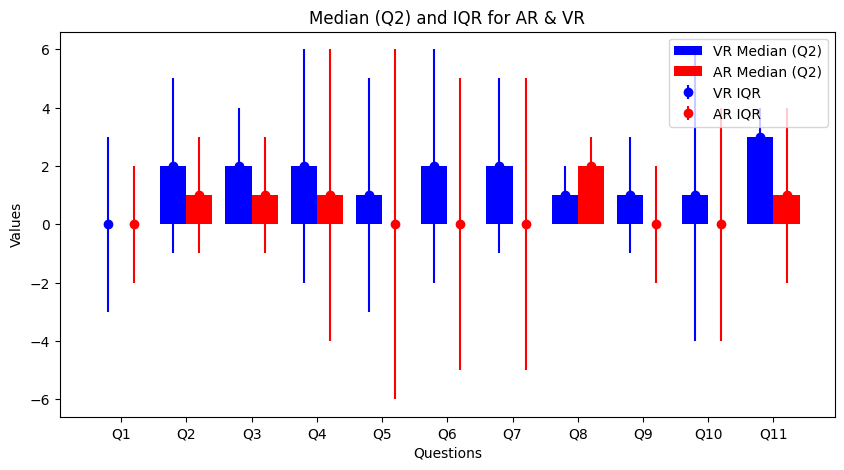

VR Data Quartiles
QuestionID  Q1  Q2  Q3  IQR
        Q1   0   0   3    3
        Q2   1   2   4    3
        Q3   1   2   3    2
        Q4   0   2   4    4
        Q5   0   1   4    4
        Q6   0   2   4    4
        Q7   0   2   3    3
        Q8   1   1   2    1
        Q9   0   1   2    2
       Q10   0   1   5    5
       Q11   2   3   3    1

AR Data Quartiles
QuestionID  Q1  Q2  Q3  IQR
        Q1   0   0   2    2
        Q2   0   1   2    2
        Q3   0   1   2    2
        Q4   0   1   5    5
        Q5   0   0   6    6
        Q6   0   0   5    5
        Q7   0   0   5    5
        Q8   1   2   2    1
        Q9   0   0   2    2
       Q10   0   0   4    4
       Q11   1   1   4    3


In [45]:
# Compute raw counts (not normalized)
def compute_counts(data):
    return np.array([(data == i).sum(axis=0) for i in range(1, 6)])

vr_raw_counts = compute_counts(vr_data)
ar_raw_counts = compute_counts(ar_data)

# Compute quartiles and IQR
q1_vr = np.percentile(vr_raw_counts, 25, axis=0)
q2_vr = np.percentile(vr_raw_counts, 50, axis=0)
q3_vr = np.percentile(vr_raw_counts, 75, axis=0)
iqr_vr = q3_vr - q1_vr

q1_ar = np.percentile(ar_raw_counts, 25, axis=0)
q2_ar = np.percentile(ar_raw_counts, 50, axis=0)
q3_ar = np.percentile(ar_raw_counts, 75, axis=0)
iqr_ar = q3_ar - q1_ar

# Create DataFrame for table
questions = [f"Q{i+1}" for i in range(11)]
table_vr = pd.DataFrame({
    "QuestionID": questions,
    "Q1": q1_vr.astype(int),
    "Q2": q2_vr.astype(int),
    "Q3": q3_vr.astype(int),
    "IQR": iqr_vr.astype(int)
})

table_ar = pd.DataFrame({
    "QuestionID": questions,
    "Q1": q1_ar.astype(int),
    "Q2": q2_ar.astype(int),
    "Q3": q3_ar.astype(int),
    "IQR": iqr_ar.astype(int)
})

# Plot Q2 and IQR
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(questions))

ax.bar(x - 0.2, table_vr["Q2"], width=0.4, label="VR Median (Q2)", color='blue')
ax.bar(x + 0.2, table_ar["Q2"], width=0.4, label="AR Median (Q2)", color='red')

ax.errorbar(x - 0.2, table_vr["Q2"], yerr=table_vr["IQR"], fmt='o', color='blue', label="VR IQR")
ax.errorbar(x + 0.2, table_ar["Q2"], yerr=table_ar["IQR"], fmt='o', color='red', label="AR IQR")

ax.set_xticks(x)
ax.set_xticklabels(questions)
ax.set_xlabel("Questions")
ax.set_ylabel("Values")
ax.set_title("Median (Q2) and IQR for AR & VR")
ax.legend()
plt.show()

# Display tables
print("VR Data Quartiles")
print(table_vr.to_string(index=False))
print("\nAR Data Quartiles")
print(table_ar.to_string(index=False))
